In [12]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [14]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/tmp/ipykernel_12396/1283179213.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/tmp/ipykernel_12396/1283179213.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [15]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4200      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [23]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=5)

Epoch 1/5
943/943 [==============================] - 13s 13ms/step - loss: 0.3711 - accuracy: 0.8136 - val_loss: 0.3716 - val_accuracy: 0.8164
Epoch 2/5
943/943 [==============================] - 10s 11ms/step - loss: 0.3692 - accuracy: 0.8129 - val_loss: 0.3719 - val_accuracy: 0.8088
Epoch 3/5
943/943 [==============================] - 12s 13ms/step - loss: 0.3676 - accuracy: 0.8159 - val_loss: 0.3650 - val_accuracy: 0.8163
Epoch 4/5
943/943 [==============================] - 10s 11ms/step - loss: 0.3680 - accuracy: 0.8137 - val_loss: 0.3659 - val_accuracy: 0.8126
Epoch 5/5
943/943 [==============================] - 11s 12ms/step - loss: 0.3674 - accuracy: 0.8135 - val_loss: 0.3937 - val_accuracy: 0.8092


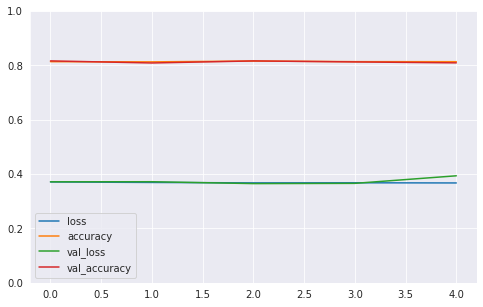

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 5ms/step - loss: 0.3937 - accuracy: 0.8092


[0.3936832547187805, 0.8092297315597534]

In [26]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test) )

/home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8092297476759628

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [1]:
from sklearn.preprocessing import StandardScaler



# Zad. 
Stwórz wykres porównujący metody. 

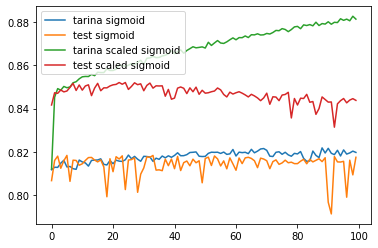